In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import missingno as msno


In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 결측치 처리

3 Customer_care_calls 5423 non-null float64   -  0 으로 채움  
6 Prior_purchases 6049 non-null float64  - 0 으로 채움  
9 Discount_offered 3468 non-null float64  - 0 으로 채움  

In [17]:
train['Customer_care_calls']

0       2.0
1       5.0
2       3.0
3       3.0
4       NaN
       ... 
6994    4.0
6995    3.0
6996    NaN
6997    3.0
6998    3.0
Name: Customer_care_calls, Length: 6999, dtype: float64

In [18]:
# 3 Customer_care_calls 5423 non-null float64 - 0 으로 채움
train['Customer_care_calls'].fillna(0, inplace=True)

In [19]:
train['Customer_care_calls'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6999 entries, 0 to 6998
Series name: Customer_care_calls
Non-Null Count  Dtype  
--------------  -----  
6999 non-null   float64
dtypes: float64(1)
memory usage: 54.8 KB


In [20]:
train['Cost_of_the_Product'].describe()

count    6999.000000
mean      214.249178
std       208.294273
min        96.000000
25%       169.000000
50%       214.000000
75%       251.000000
max      9999.000000
Name: Cost_of_the_Product, dtype: float64

In [21]:
Customer_care_calls 5423

SyntaxError: invalid syntax (4226743416.py, line 1)

In [22]:
# 6 Prior_purchases 6049 non-null float64 - 0 으로 채움
train['Prior_purchases'].fillna(0, inplace=True)

In [23]:
train['Prior_purchases'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6999 entries, 0 to 6998
Series name: Prior_purchases
Non-Null Count  Dtype  
--------------  -----  
6999 non-null   float64
dtypes: float64(1)
memory usage: 54.8 KB


In [24]:
# 9 Discount_offered 3468 non-null float64 - 0 으로 채움
train['Discount_offered'].fillna(0, inplace=True)

In [25]:
train['Prior_purchases'].replace('0', 'null', inplace=True)

In [26]:
train['Discount_offered'].unique()

array([ 0.,  6.,  2.,  9.,  3., 34.,  7.,  1., 53.,  8., 63.,  4., 43.,
       60., 51.,  5., 10., 55., 17., 62., 15., 23., 38., 32., 39., 29.,
       45., 14., 52., 41., 58., 11., 50., 35., 28., 31., 24., 64., 61.,
       48., 65., 40., 18., 22., 56., 49., 21., 27., 20., 13., 30., 26.,
       54., 16., 57., 47., 42., 36., 37., 46., 19., 12., 25., 44., 33.,
       59.])

In [27]:
# 결측치 처리 완료 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6999 non-null   int64  
 1   Warehouse_block      6999 non-null   object 
 2   Mode_of_Shipment     6999 non-null   object 
 3   Customer_care_calls  6999 non-null   float64
 4   Customer_rating      6999 non-null   int64  
 5   Cost_of_the_Product  6999 non-null   int64  
 6   Prior_purchases      6999 non-null   float64
 7   Product_importance   6999 non-null   object 
 8   Gender               6999 non-null   object 
 9   Discount_offered     6999 non-null   float64
 10  Weight_in_gms        6999 non-null   object 
 11  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 656.3+ KB


# 이상치

In [28]:
# Cost_of_the_Product - 9999이상치 제거 후 중앙값으로 대체
# Customer_rating - 평점 99 2개 평균 평점으로 대체
# Product_importance - 데이터 카테고리 이름 오타 수정

In [29]:
# 1. Cost_of_the_Product 9999 이상치 제거 
# 2. Cost_of_the_Product 제거 후 중앙값 찾기
# 3. Cost_of_the_Product 9999자리에 중앙값 대체

# Cost_of_the_Product

In [30]:
# Cost_of_the_Product 9999 이상치 제거 
train_filtered = train[train['Cost_of_the_Product'] != 9999]

In [31]:
# Cost_of_the_Product 제거 후 중앙값 찾기

train_filtered['Cost_of_the_Product'].median()

214.0

In [32]:
# Cost_of_the_Product 9999자리에 중앙값 대체
median_cost = train['Cost_of_the_Product'].median()

train['Cost_of_the_Product'].replace(9999, median_cost, inplace=True)

In [33]:
# 이상치 제거 확인
count_99 = (train['Cost_of_the_Product'] == 9999)
count_99.sum()

0

# Customer_rating

In [ ]:
train['Customer_rating'].describe()

In [35]:
train['Customer_rating'].unique()

array([ 2,  3,  1,  5,  4, 99], dtype=int64)

In [36]:
# 이상치 99 개수 확인
count_excluding_1_to_5 = ((train['Customer_rating'] < 1) | (train['Customer_rating'] > 5)).sum()
count_excluding_1_to_5

2

In [37]:
# 평점 99 제거
train_filtered = train[train['Customer_rating'] != 99]

In [38]:
# 중앙값 
train_filtered['Customer_rating'].median()

3.0

In [39]:
# 99를 평점 중앙값으로 대체
median_cost = train['Customer_rating'].median()

train['Customer_rating'].replace(99, median_cost, inplace=True)

In [40]:
# 이상치 99 개수 확인
count_excluding_1_to_5 = ((train['Customer_rating'] < 1) | (train['Customer_rating'] > 5)).sum()
count_excluding_1_to_5

0

# Product_importance

In [41]:
train['Product_importance'].unique()

array(['low', 'medium', 'high', '?', 'mediumm', 'loww', 'highh'],
      dtype=object)

In [42]:
(train['Product_importance'] == '?').sum()

97

# 카테고리 이름 수정

In [43]:
train['Product_importance'].replace('mediumm', 'medium', inplace=True)

In [44]:
train['Product_importance'].replace('loww', 'low', inplace=True)

In [45]:
train['Product_importance'].replace('highh', 'high', inplace=True)

# ? 이름 수정  손안댐
- 어떻게 수정해야 좋을지 확인 못함

In [46]:
# train['Product_importance'].replace('?', '?', inplace=True)

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6999 non-null   int64  
 1   Warehouse_block      6999 non-null   object 
 2   Mode_of_Shipment     6999 non-null   object 
 3   Customer_care_calls  6999 non-null   float64
 4   Customer_rating      6999 non-null   int64  
 5   Cost_of_the_Product  6999 non-null   int64  
 6   Prior_purchases      6999 non-null   float64
 7   Product_importance   6999 non-null   object 
 8   Gender               6999 non-null   object 
 9   Discount_offered     6999 non-null   float64
 10  Weight_in_gms        6999 non-null   object 
 11  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 656.3+ KB


<Axes: >

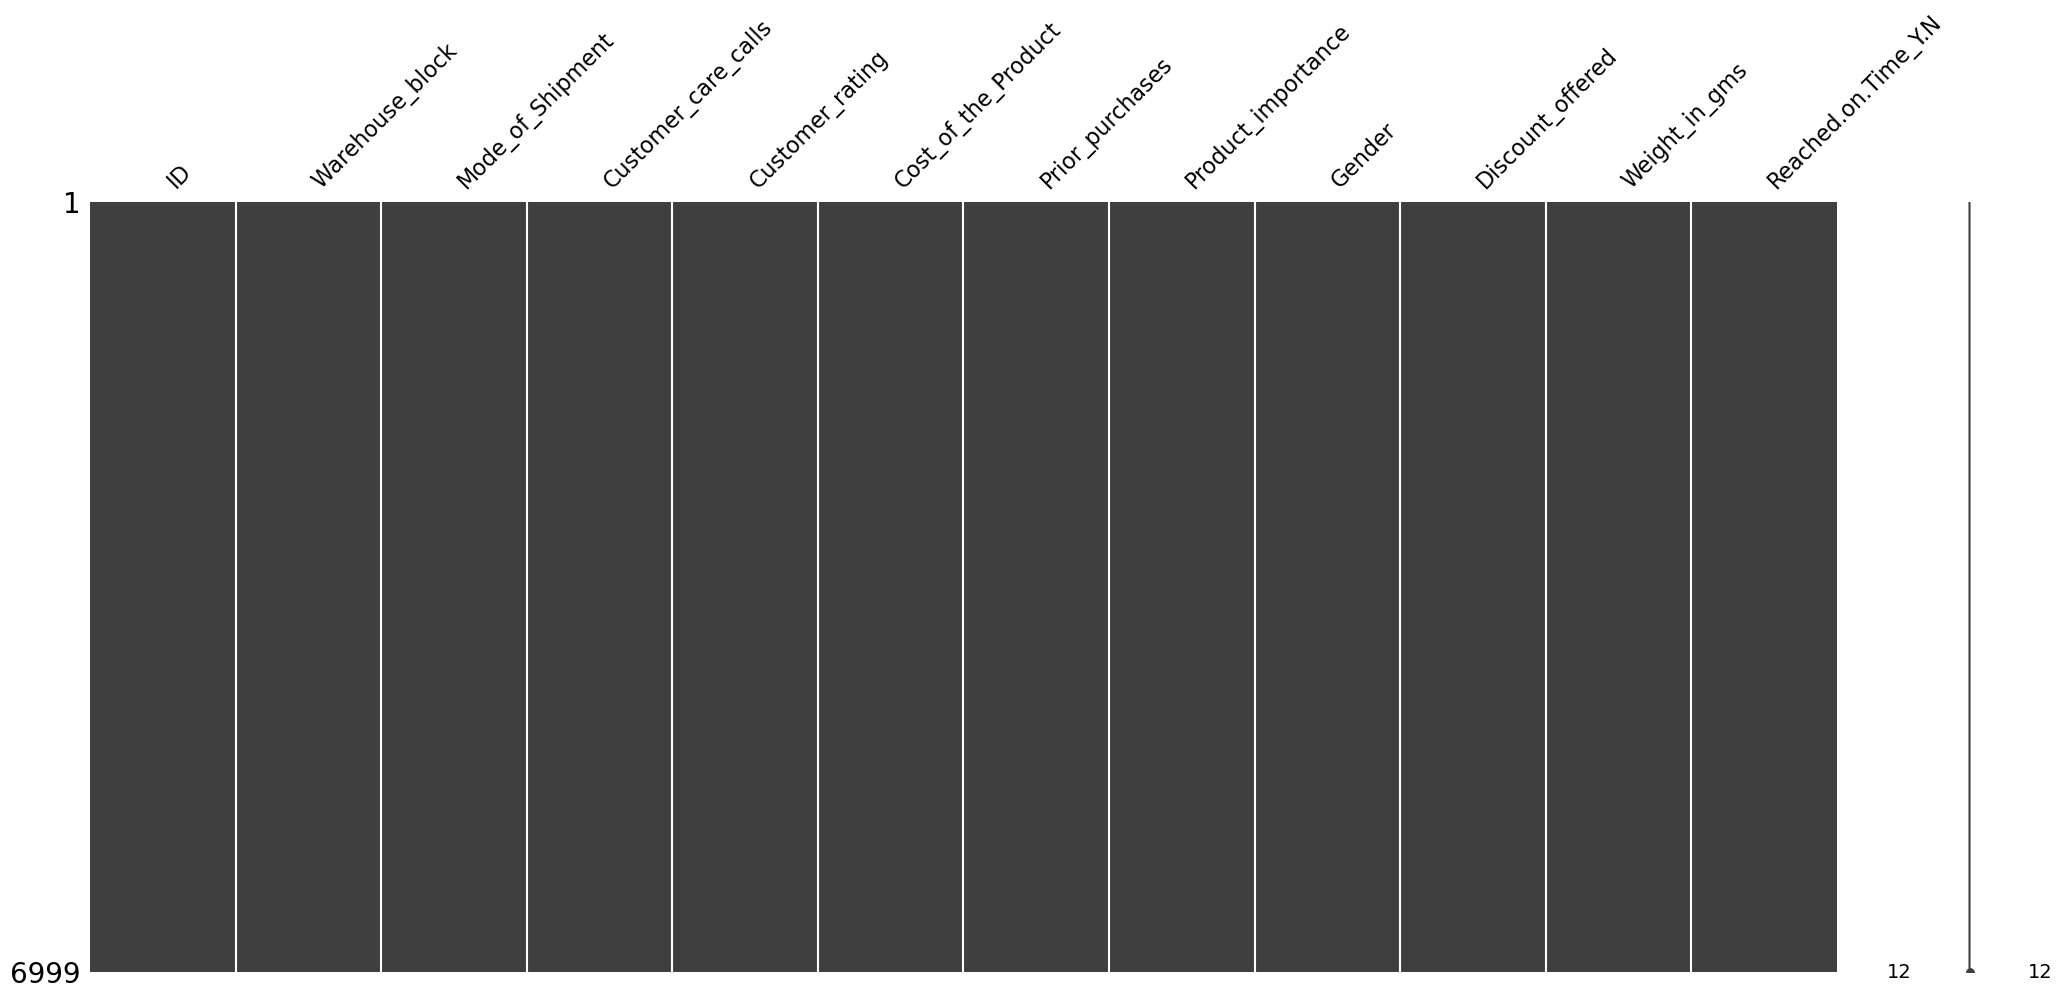

In [48]:
msno.matrix(train)


In [49]:
# train.corr()

C:\Users\heewo\AppData\Local\Temp\ipykernel_16744\2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N
ID,1.000000,0.010603,-0.000533,0.006460,0.016337,-0.002613,-0.014909
Customer_care_calls,0.010603,1.000000,0.009423,0.144350,0.059339,-0.046734,-0.061375
Customer_rating,-0.000533,0.009423,1.000000,0.006108,0.013079,-0.010548,0.001127
Cost_of_the_Product,0.006460,0.144350,0.006108,1.000000,0.095558,-0.080011,-0.068100
Prior_purchases,0.016337,0.059339,0.013079,0.095558,1.000000,-0.033104,-0.032579
Discount_offered,-0.002613,-0.046734,-0.010548,-0.080011,-0.033104,1.000000,0.242017
Reached.on.Time_Y.N,-0.014909,-0.061375,0.001127,-0.068100,-0.032579,0.242017,1.000000


In [50]:
# 상관관계가 높은 데이터를 가지고 피봇테이블을 만들어보자
pt1 = train.pivot_table(values='Cost_of_the_Product', # 데이터로 사용할 데이터 지정
                       index=['Customer_care_calls'], # 인덱스를 설정하겠다(멀티 인덱스)
                        # 생존 여부에 영향을 많이 미치는 성별도 추가
                        # 인덱스를 설정할 때 1차로 Pclass로 나눈 뒤 성별로 한번 더 나눔
                        aggfunc='mean' # 데이터 요약시 사용하는 함수를 지정
                        # (mean / sum / count)
                       )
pt1
pt1_sorted = pt1.sort_values(by='Cost_of_the_Product', ascending=False)
pt1_sorted




,Cost_of_the_Product
Customer_care_calls,
7.0,277.658120
6.0,246.665323
5.0,215.332171
0.0,210.540609
4.0,205.936219
3.0,198.543827
2.0,185.644599


 - 상품의 금액이 클수록 문의 전화가 많이 왔다.

In [51]:
# 정답과 관계성 파악 Reached.on.Time_Y.N

In [52]:
pt1 = train.pivot_table(values='Discount_offered',
                       index=['Reached.on.Time_Y.N',],
                       aggfunc='mean')

pt1_sorted_descending = pt1.sort_values(by='Reached.on.Time_Y.N', ascending=False)

pt1_sorted_descending

,Discount_offered
Reached.on.Time_Y.N,
1,9.194858
0,2.731054


- 할인제공 물품과 제때 배송 여부와 관계도가 가장 깊어보임
- 두번째로 상품의 금액이 높을수록 배송 여부 높음
- 세번째로 고객 전화가 연관성 높음 

원핫 인코딩 해보려다 망함  

<class 'pandas.core.frame.DataFrame'>  
RangeIndex: 6999 entries, 0 to 6998  
Columns: 3357 entries, ID to Weight_in_gms_?  
dtypes: float64(3), int64(4), uint8(3350)  
memory usage: 22.7 MB  

#원핫 인코딩  
X_train = pd.get_dummies(train)  
X_test = pd.get_dummies(test)  

컬럼이 3천 개가 되는 바람에 유의미한 결과 보기 어려움  
필요없는 컬럼 제거 / 범주형데이터만 원핫 인코딩 해야함  


범주형만 원핫 햇으나 컬럼 3천개
원핫에 필요없는 컬럼   

상품 무게  ?  
젠더  


In [53]:
# 범주형 데이터만 뽑기
train_ob=train.select_dtypes(include=['object'])
train_ob

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Weight_in_gms
0,C,Ship,low,M,1339
1,F,Flight,low,F,1082
2,F,Ship,low,M,4971
3,F,Ship,medium,M,5640
4,D,Flight,high,F,4944
...,...,...,...,...,...
6994,D,Ship,medium,F,1783
6995,F,Ship,medium,F,5208
6996,D,Ship,low,F,1787
6997,A,Road,medium,M,4719


In [54]:
# 범주형만 원핫 인코딩
#train_object=pd.get_dummies(train_ob)
#train_object

,Warehouse_block _A,Warehouse_block _B,Warehouse_block _C,Warehouse_block _D,Warehouse_block _F,Mode_of_Shipment_ Flight,Mode_of_Shipment_ Flightzk,Mode_of_Shipment_ Road,Mode_of_Shipment_ Roadzk,Mode_of_Shipment_ Ship,...,Weight_in_gms_5995,Weight_in_gms_5997,Weight_in_gms_5998,Weight_in_gms_5999,Weight_in_gms_6000,Weight_in_gms_6064,Weight_in_gms_7401,Weight_in_gms_7640,Weight_in_gms_7846,Weight_in_gms_?
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6995,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6996,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6997,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
try:
    # "Weight_in_gms" 열의 데이터를 정수로 변환합니다.
    train['Weight_in_gms'] = train['Weight_in_gms'].astype(int)
except ValueError as e:
    # 변환에 실패한 경우 예외가 발생합니다.
    print(f"변환에 실패한 행의 인덱스: {e}")

변환에 실패한 행의 인덱스: invalid literal for int() with base 10: '?'


In [56]:
train['Weight_in_gms'].describe()

count     6999
unique    3332
top          ?
freq       446
Name: Weight_in_gms, dtype: object

In [57]:


# 데이터프레임을 생성하거나 불러옵니다.
# 예를 들어, train 데이터프레임을 불러왔다고 가정합니다.
# train = pd.read_csv('train.csv')

# 범주형 데이터를 더미 변수로 변환합니다.
dummy_weight = pd.get_dummies(train['Weight_in_gms'], prefix='Weight')

# 더미 변수를 기존 데이터프레임에 결합합니다.
combined_df = pd.concat([train['Reached.on.Time_Y.N'], dummy_weight], axis=1)

# 상관 계수를 계산합니다.
correlation_matrix = combined_df.corr()

# "Reached.on.Time_Y.N"와 다른 변수 간의 상관 관계를 확인합니다.
correlation_with_target = correlation_matrix['Reached.on.Time_Y.N']

# 결과 출력
print(correlation_with_target)


Reached.on.Time_Y.N    1.000000
Weight_1001            0.003037
Weight_1002           -0.014479
Weight_1003           -0.020478
Weight_1005           -0.004610
                         ...   
Weight_6064            0.009869
Weight_7401            0.009869
Weight_7640            0.009869
Weight_7846            0.009869
Weight_?               0.034293
Name: Reached.on.Time_Y.N, Length: 3333, dtype: float64


In [60]:
train.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,3500.000000,3.141592,2.996285,210.055008,3.090870,6.574796,0.594656
std,2020.581599,1.964630,1.410161,48.220091,1.877813,13.113507,0.490993
min,1.000000,0.000000,1.000000,96.000000,0.000000,0.000000,0.000000
25%,1750.500000,2.000000,2.000000,169.000000,2.000000,0.000000,0.000000
50%,3500.000000,4.000000,3.000000,214.000000,3.000000,0.000000,1.000000
75%,5249.500000,5.000000,4.000000,251.000000,4.000000,7.000000,1.000000
max,6999.000000,7.000000,5.000000,310.000000,10.000000,65.000000,1.000000


In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6999 non-null   int64  
 1   Warehouse_block      6999 non-null   object 
 2   Mode_of_Shipment     6999 non-null   object 
 3   Customer_care_calls  6999 non-null   float64
 4   Customer_rating      6999 non-null   int64  
 5   Cost_of_the_Product  6999 non-null   int64  
 6   Prior_purchases      6999 non-null   float64
 7   Product_importance   6999 non-null   object 
 8   Gender               6999 non-null   object 
 9   Discount_offered     6999 non-null   float64
 10  Weight_in_gms        6999 non-null   object 
 11  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 656.3+ KB


In [66]:
train.drop('Warehouse_block ', inplace=True)
test.drop('Warehouse_block ', inplace=True)

KeyError: "['Warehouse_block '] not found in axis"

In [ ]:
tr